# Tokenize

In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/home/cairs/miniconda3/envs/huggingface/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")
print(encoded_input)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [3]:
tokenizer.decode(encoded_input["input_ids"])

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

In [4]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences)
print(encoded_inputs)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}


# Pad

In [5]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True)
print(encoded_input)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


# Truncation
sentence too long

In [6]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True)
print(encoded_input)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [7]:
tokenizer.decode(0)

'[PAD]'

In [8]:
tokenizer.decode(102)

'[SEP]'

# Build tensors

In [9]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_input)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


# Audio

In [10]:
from datasets import load_dataset, Audio

dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")

Reusing dataset minds14 (/home/cairs/.cache/huggingface/datasets/PolyAI___minds14/en-US/1.0.0/ca170f4e2acf536108fbb62103a210428d54744476a461115e41d4b2b57b185f)


In [11]:
dataset[0]["audio"]

{'path': '/home/cairs/.cache/huggingface/datasets/downloads/extracted/8bbba14a4a2f563441afb82208a06de781eabfe0c463b8aa3e6c4454e3611f85/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ], dtype=float32),
 'sampling_rate': 8000}

# Resample
resample to 16kHz

In [12]:
dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")
dataset[0]["audio"]

Reusing dataset minds14 (/home/cairs/.cache/huggingface/datasets/PolyAI___minds14/en-US/1.0.0/ca170f4e2acf536108fbb62103a210428d54744476a461115e41d4b2b57b185f)


{'path': '/home/cairs/.cache/huggingface/datasets/downloads/extracted/8bbba14a4a2f563441afb82208a06de781eabfe0c463b8aa3e6c4454e3611f85/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ], dtype=float32),
 'sampling_rate': 8000}

In [13]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))

In [14]:
dataset[0]["audio"]

{'path': '/home/cairs/.cache/huggingface/datasets/downloads/extracted/8bbba14a4a2f563441afb82208a06de781eabfe0c463b8aa3e6c4454e3611f85/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 4.2671094e-05,  2.1693909e-04,  2.0208921e-04, ...,
         5.0405371e-05,  9.8095711e-07, -3.1358570e-05], dtype=float32),
 'sampling_rate': 16000}

# Feature extrcator

normalize and pad the input
add a 0 - interpreted as silence - to array.

In [15]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

/home/cairs/miniconda3/envs/huggingface/lib/python3.10/site-packages/transformers/configuration_utils.py:358: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [16]:
audio_input = [dataset[0]["audio"]["array"]]
feature_extractor(audio_input, sampling_rate=16000)

{'input_values': [array([ 0.00061643,  0.00274779,  0.00256617, ...,  0.00071103,
        0.00010655, -0.00028897], dtype=float32)]}

In [17]:
feature_extractor(audio_input, sampling_rate=16000)['input_values'][0].shape

(173398,)

# Pad and truncate

In [18]:
dataset[0]["audio"]["array"].shape

(173398,)

In [19]:
dataset[1]["audio"]["array"].shape

(106496,)

In [20]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=16000,
        padding=True,
        max_length=100000,
        truncation=True,
    )
    return inputs

In [21]:
processed_dataset = preprocess_function(dataset[:5])

In [22]:
processed_dataset["input_values"][0].shape

(100000,)

In [23]:
processed_dataset["input_values"][1].shape

(100000,)

# Vision

In [24]:
from datasets import load_dataset

dataset = load_dataset("food101", split="train[:100]")

Using custom data configuration default
Reusing dataset food101 (/home/cairs/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295)


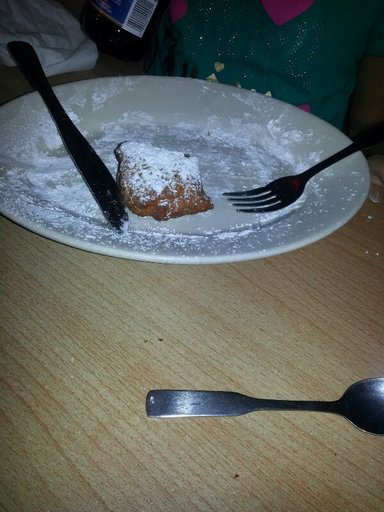

In [25]:
dataset[0]["image"]

In [26]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

In [27]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

# Data augmentation

In [28]:
from torchvision.transforms import Compose, Normalize, RandomResizedCrop, ColorJitter, ToTensor

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
_transforms = Compose(
    [RandomResizedCrop(feature_extractor.size), ColorJitter(brightness=0.5, hue=0.5), ToTensor(), normalize]
)

In [29]:
def transforms(examples):
    examples["pixel_values"] = [_transforms(image.convert("RGB")) for image in examples["image"]]
    return examples

In [30]:
dataset.set_transform(transforms)

Parameter 'transform'=<function transforms at 0x7fa4d1f8ab90> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


In [31]:
#dataset[0]["image"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


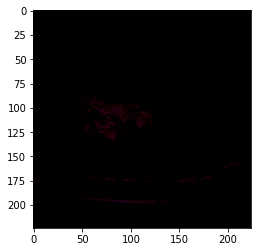

In [32]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))

# Multimodal

In [33]:
from datasets import load_dataset

lj_speech = load_dataset("lj_speech", split="train")

Reusing dataset lj_speech (/home/cairs/.cache/huggingface/datasets/lj_speech/main/1.1.0/6e03b5308ab68705d902e2bbeaff59feb283307770fafb8d6704e604b6d179aa)


the audio and text column, remove the other columns

In [34]:
lj_speech = lj_speech.map(remove_columns=["file", "id", "normalized_text"])

100%|██████████| 13100/13100 [00:00<00:00, 34216.66ex/s]


In [35]:
lj_speech

Dataset({
    features: ['audio', 'text'],
    num_rows: 13100
})

In [36]:
lj_speech[0]["audio"]


{'path': '/home/cairs/.cache/huggingface/datasets/downloads/extracted/e7a2ed60bd7a738641542e09fbce2ac1b025d1ee727b7af815e8740d30d86d19/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'array': array([-7.3242188e-04, -7.6293945e-04, -6.4086914e-04, ...,
         7.3242188e-04,  2.1362305e-04,  6.1035156e-05], dtype=float32),
 'sampling_rate': 22050}

In [37]:
lj_speech[0]["text"]

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

In [38]:
lj_speech = lj_speech.cast_column("audio", Audio(sampling_rate=16_000))

# Processor
feature extractor + tokenizer

In [39]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base-960h")

Create a function to process the audio data to input_values, and tokenizes the text to labels. These are your inputs to the model:

In [40]:
def prepare_dataset(example):
    audio = example["audio"]

    example["input_values"] = processor(audio["array"], sampling_rate=16000)

    with processor.as_target_processor():
        example["labels"] = processor(example["text"]).input_ids
    return example

In [41]:
prepare_dataset(lj_speech[0])

{'audio': {'path': '/home/cairs/.cache/huggingface/datasets/downloads/extracted/e7a2ed60bd7a738641542e09fbce2ac1b025d1ee727b7af815e8740d30d86d19/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00063407, -0.00075199, -0.00068336, ...,  0.00068584,
          0.00013921,  0.        ], dtype=float32),
  'sampling_rate': 16000},
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'input_values': {'input_values': [array([-6.6753007e-03, -7.9126023e-03, -7.1924743e-03, ...,
         7.1743531e-03,  1.4386778e-03, -2.2044291e-05], dtype=float32)]},
 'labels': [23,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
 

In [43]:
output = prepare_dataset(lj_speech[0])

In [48]:
lj_speech[0]

{'audio': {'path': '/home/cairs/.cache/huggingface/datasets/downloads/extracted/e7a2ed60bd7a738641542e09fbce2ac1b025d1ee727b7af815e8740d30d86d19/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00063407, -0.00075199, -0.00068336, ...,  0.00068584,
          0.00013921,  0.        ], dtype=float32),
  'sampling_rate': 16000},
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'}

In [47]:
print(output.keys())

dict_keys(['audio', 'text', 'input_values', 'labels'])
